In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [10]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [11]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


1. Find the linear regression equation for this data.

In [12]:
X=df[['Chirps/Second']]
Y=df['Ground Temperature']

In [13]:
#fitting the model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X,Y)

LinearRegression()

In [18]:
#finding intercept and coeff
c=round(linear_reg.intercept_,2)
m=linear_reg.coef_

In [19]:
print("The linear regression equation is : y={}*x + ({})".format(m,c))

The linear regression equation is : y=[3.410323]*x + (22.85)


2. Chart the original data and the equation on the chart.

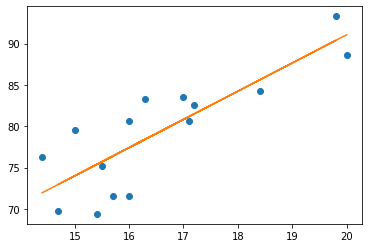

In [28]:
plt.plot(X,Y,"o")
plt.plot(X,linear_reg.predict(X))

3.Find the equation's  $R^2$ score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
r_sq = linear_reg.score(X,Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6922946529147003


0.69<0.8 its not a strong correlation

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?


In [30]:
linear_reg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([346.82966726])

The chirping per second for the temprature 95 is 346.82

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [31]:
from scipy.interpolate import interp1d

In [32]:
interpolate_X = 18

In [33]:
y=df["Ground Temperature"]
X=df["Chirps/Second"]

In [34]:
y_interp = interp1d(X, y)

In [35]:
print("Value of Y at x = {} is".format(interpolate_X),
      y_interp(interpolate_X))

Value of Y at x = 18 is 83.73333333333333


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [37]:
df = pd.read_fwf("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


1.Find the linear regression equation for this data for brain weight to body weight.

In [38]:
X=df[['Brain']]
Y=df['Body']

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [40]:
lin_reg.fit(X,Y)

LinearRegression()

In [41]:
m=lin_reg.coef_
c=lin_reg.intercept_

In [42]:
print('The Linear Regression Equation for the data is : y=',m,'x+',c)

The Linear Regression Equation for the data is : y= [0.96649637] x+ 91.00439620740687


2.Chart the original data and the equation on the chart.

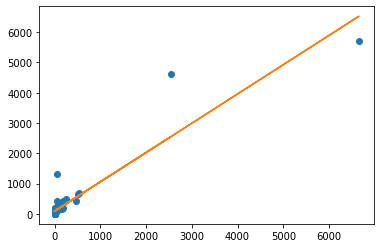

In [43]:
plt.plot(X,Y,'o')
plt.plot(X,lin_reg.predict(X))

3.Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [45]:
score=lin_reg.score(X,Y)*100
score

87.26620843043331

Since the score is above 80% it is considered a strong correlation

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_fwf("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [55]:
df.shape

(52, 6)

1.Find the linear regression equation for this data using columns 1-5 to column 6.

In [57]:
X=df.drop(columns=['Salary'])
Y=df['Salary']

In [58]:
model=LinearRegression()

In [59]:
model.fit(X,Y)

LinearRegression()

In [60]:
m=model.coef_
c=model.intercept_
print('The equation of Linear Regression is: y=',m,'x+',c)

The equation of Linear Regression is: y= [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] x+ 11410.14654725559


2.Find the selection of columns with the best  score.

In [69]:
X1=df[['Sex']]
X2=df[['Rank']]
X3=df[['Year']]
X4=df[['Degree']]
X5=df[['YSdeg']]
Y=df['Salary']

In [62]:
model=LinearRegression()

In [67]:
model1=model.fit(X1,Y)
print('Score1: ',model.score(X1,Y)*100)
model2=model.fit(X2,Y)
print('Score2: ',model.score(X2,Y)*100)
model3=model.fit(X3,Y)
print('Score3: ',model.score(X3,Y)*100)
model4=model.fit(X4,Y)
print('Score4: ',model.score(X4,Y)*100)
model5=model.fit(X5,Y)
print('Score5: ',model.score(X5,Y)*100)

Score1:  6.389892583288004
Score2:  75.25360539274632
Score3:  49.09370267692162
Score4:  0.48616809847483733
Score5:  45.54281345836028


The R square score is high when X='Rank'



3.Report whether sex is a factor in salary.

In [71]:
X1=df[['Sex']]

In [72]:
model1=model.fit(X1,Y)
print('Score1: ',model.score(X1,Y)*100)

Score1:  6.389892583288004


R2 vaue of 'SEX' is 6.38, which is too low. so sex is not a factory in determining salary